
# <span style="color:rgb(213,80,0)">AR regression data</span>

This file creates Figures 4.15-4.22


In [1]:
close all;
load('multiple_regression.txt');
y=multiple_regression(:,4);
X=multiple_regression(:,1:3);
n=length(y);
prin=0;

## Create Figure 4.15

Forward EDA rescaled t stat monitoring


In [2]:
showtit=false;

% LMS using 10000 subsamples
[out]=LXS(y,X,'nsamp',10000);

Total estimated time to complete LMS:  0.03 seconds


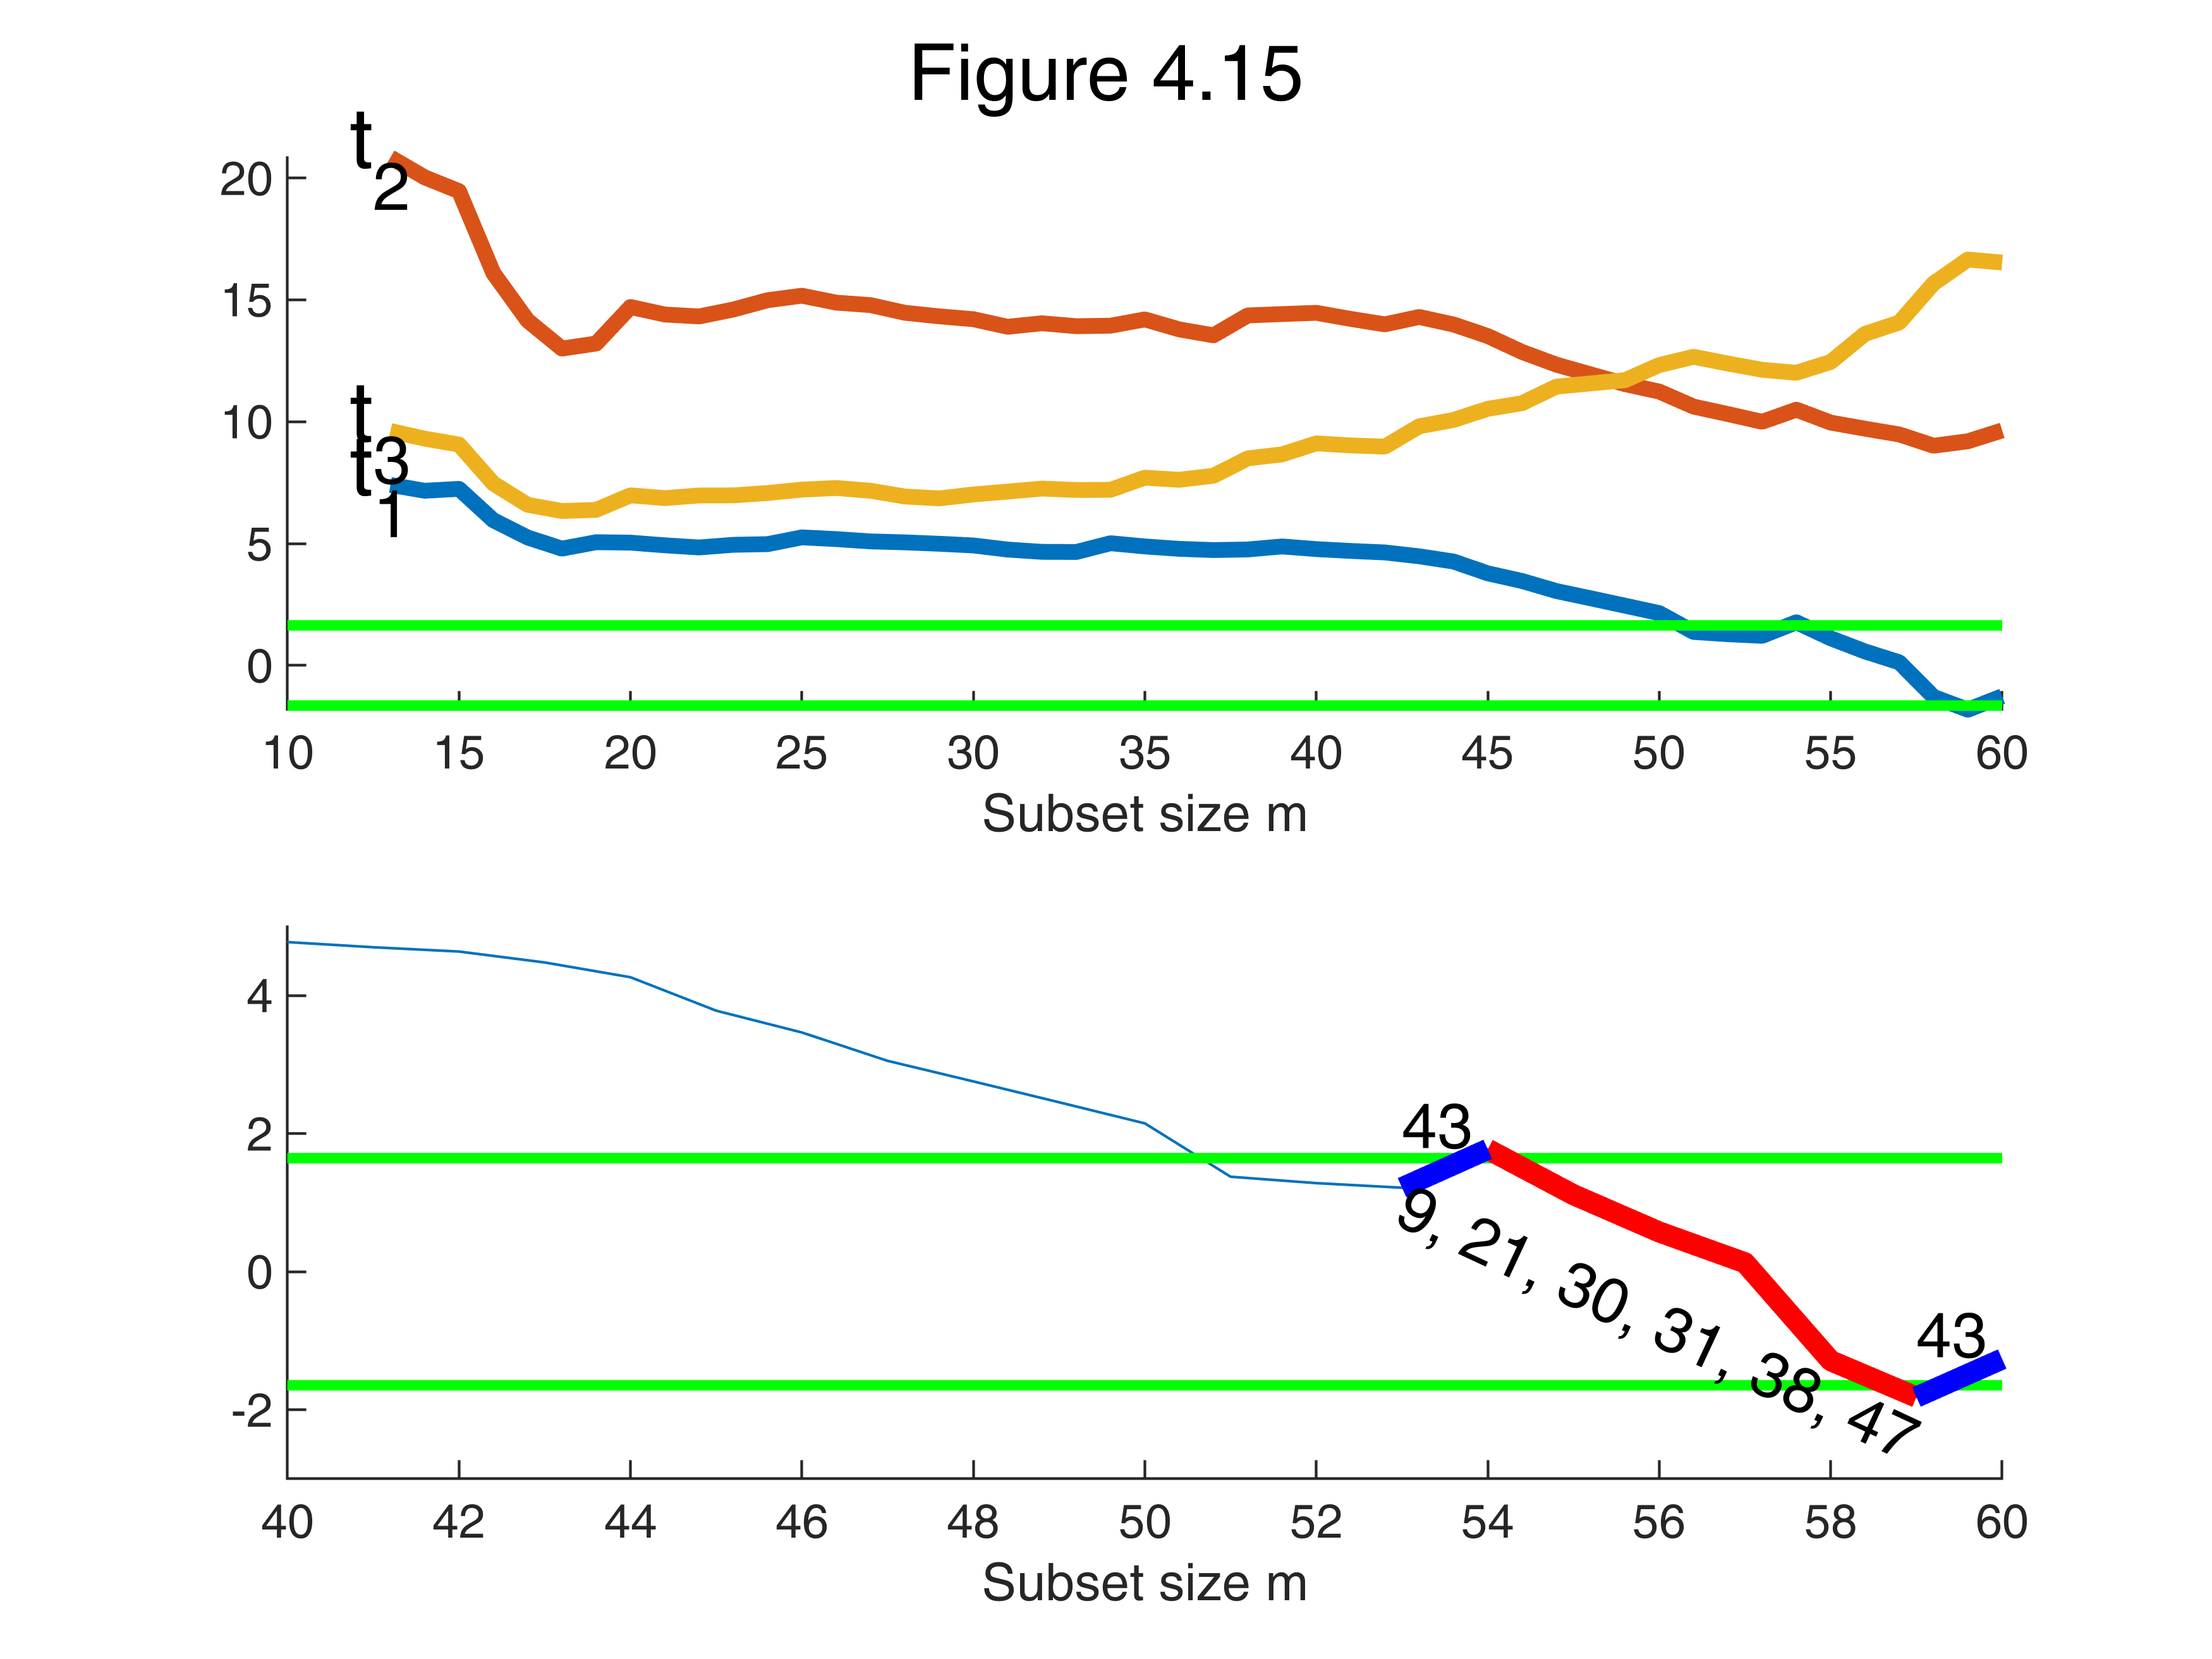

In [3]:
% Forward Search
[out]=FSReda(y,X,out.bs);
nr=2;
nc=1;
subplot(nr,nc,1)
hold('on');
plot(out.Tols(:,1),out.Tols(:,3:end),'LineWidth',3)
for j=3:5
    tj=['t_' num2str(j-2)];
    text(out.Tols(1,1)-1.2,out.Tols(1,j),tj,'FontSize',16)

end

quant=norminv(0.95);
v=axis;
lwdenv=2;
line([v(1),v(2)],[quant,quant],'color','g','LineWidth',lwdenv);
line([v(1),v(2)],[-quant,-quant],'color','g','LineWidth',lwdenv);
% plot(out.Tols(end-6:end-1,1),out.Tols(end-6:end-1,3),'LineWidth',4,'color','r')
if showtit==true
title('Monitoring of t-stat','FontSize',14);
end
xlabel('Subset size m');

subplot(2,1,2)
% MR: monitoring of t-stat with zoom for first variable
hold('on');
plot(out.Tols(:,1),out.Tols(:,3:end))
ylim([-3 5]);
v=axis;
lwdenv=2;
line([v(1),v(2)],[quant,quant],'color','g','LineWidth',lwdenv);
line([v(1),v(2)],[-quant,-quant],'color','g','LineWidth',lwdenv);
plot(out.Tols(end-6:end-1,1),out.Tols(end-6:end-1,3),'LineWidth',4,'color','r')
if showtit==true
title('Monitoring of t-stat for first variable');
end
xlabel('Subset size m');
plot(out.Tols(end-7:end-6,1),out.Tols(end-7:end-6,3),'LineWidth',4,'color','b')
plot(out.Tols(end-1:end,1),out.Tols(end-1:end,3),'LineWidth',4,'color','b')
text(out.Tols(end-7,1),out.Tols(end-7,3)+0.9,'43','FontSize',12);
text(out.Tols(end-1,1),out.Tols(end-1,3)+0.9,'43','FontSize',12);
%annotation(gcf,'textarrow',[0.54 0.68],...
%    [0.28 0.44],'TextEdgeColor','none');
text(53,1,'9, 21, 30, 31, 38, 47','FontSize',12,'Rotation',-25);
xlim([40 60])

sgtitle('Figure 4.15')
set(gcf,"Name",'Figure 4.15')

In [4]:

if prin==1
    % print to postscript
    print -depsc ARtmonitor.eps;
end

## Prepare input for Figures 4.16-4.18

In [5]:
disp('Monitoring S regression estimators')

Monitoring S regression estimators

In [6]:
outPD=Sregeda(y,X,'plots',0,'rhofunc','mdpd','msg',0);
outOPT=Sregeda(y,X,'plots',0,'rhofunc','optimal','covrob',0,'msg',0);
outHA=Sregeda(y,X,'plots',0,'rhofunc','hampel','msg',0);
outHYP=Sregeda(y,X,'plots',0,'rhofunc','hyperbolic','msg',0);
outOPT1=Sregeda(y,X,'plots',0,'rhofunc','optimal','covrob',1,'msg',0);

fground=struct;
sel=[ 9 21 30 31 38 47    3 11 14 24 27 36 42 50 43  7 39 ]';
fground.funit=sel;
fground.FontSize=1;

LineStyle=[ repmat({'-.'},6,1); repmat({'--'},9,1); repmat({':'},2,1)];
Color= [ repmat({'r'},6,1); repmat({'k'},9,1); repmat({'b'},2,1)];
fground.Color=Color;  % different colors for different foreground trajectories
fground.LineWidth=3;
fground.LineStyle=LineStyle;
standard=struct;
% Fix ylim of the plots below
standard.ylim=[-3 7];

## Create Figure 4.16


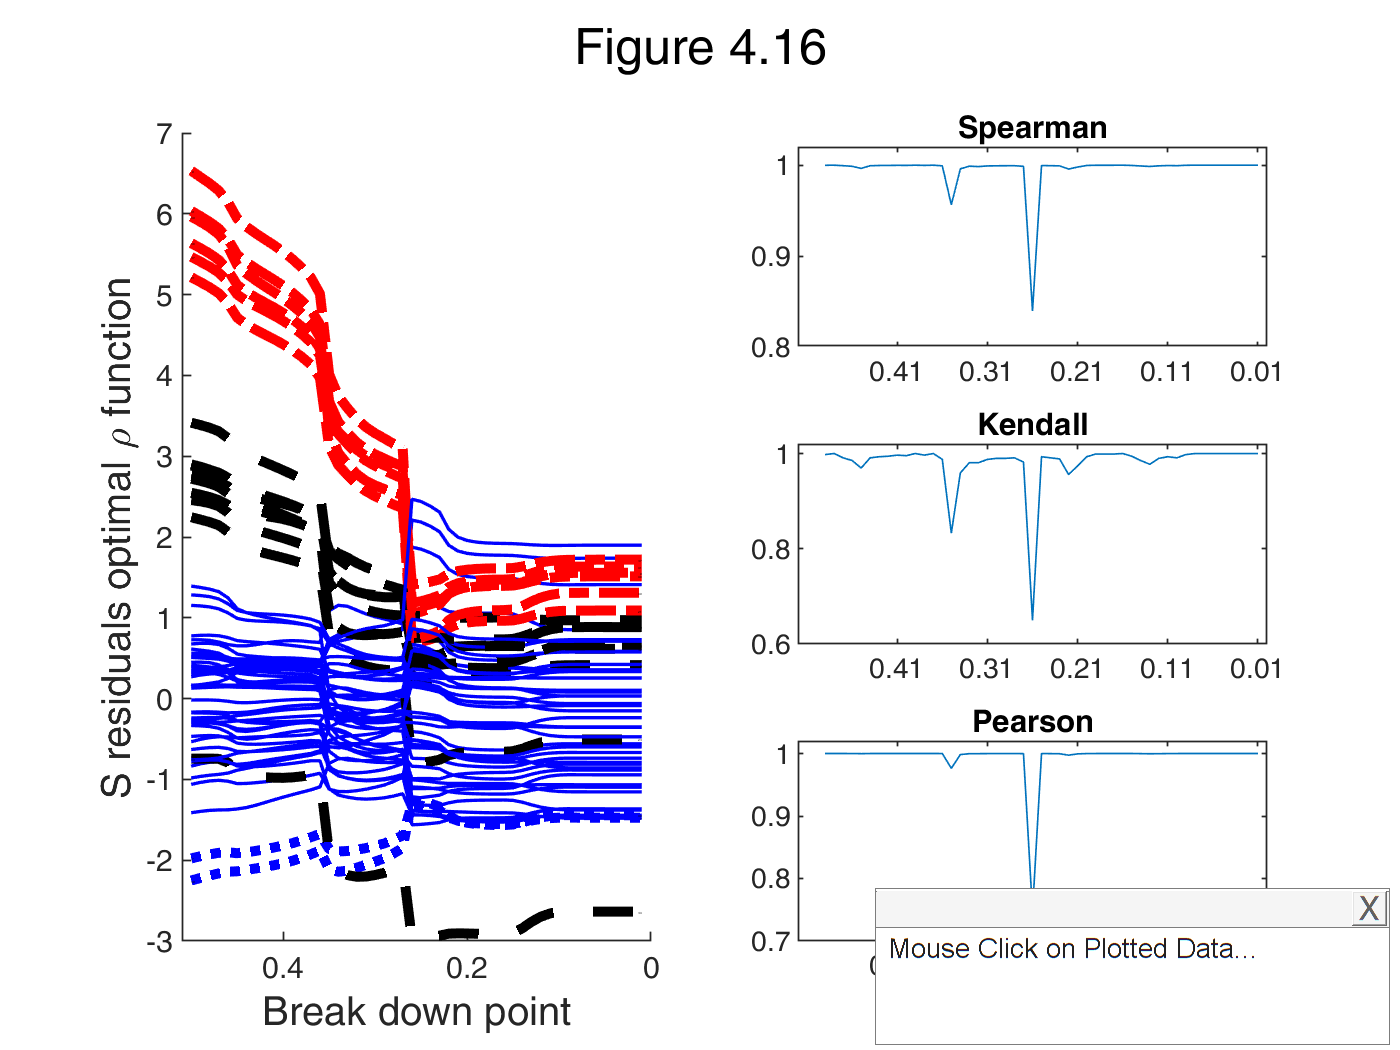

In [7]:
standard.laby='S residuals optimal \rho function';
resfwdplot(outOPT,'fground',fground,'tag','pl_OPT', ...
    'corres',true,'standard',standard);
sgtitle('Figure 4.16')
set(gcf,"Name",'Figure 4.16')

## Create left-hand panel of Figure 4.17


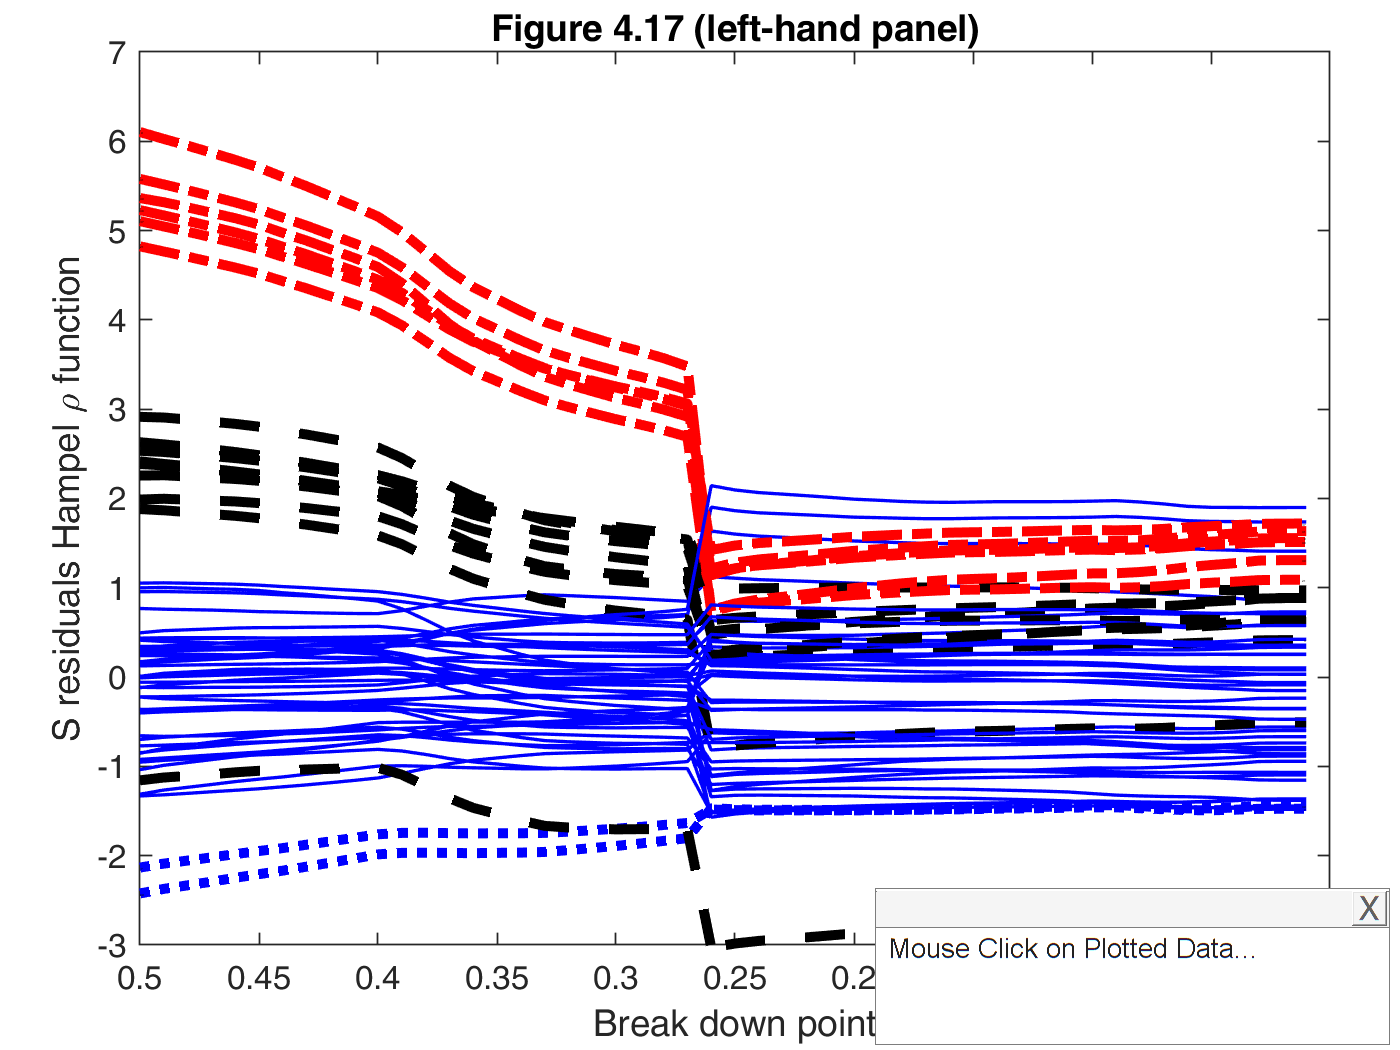

In [8]:
standard.laby='S residuals Hampel \rho function';
resfwdplot(outHA,'fground',fground,'tag','pl_HA', ...
    'corres',false,'standard',standard);
title('Figure 4.17 (left-hand panel)')
set(gcf,"Name",'Figure 4.17 (left-hand panel)')

## Create right-hand panel of Figure 4.17


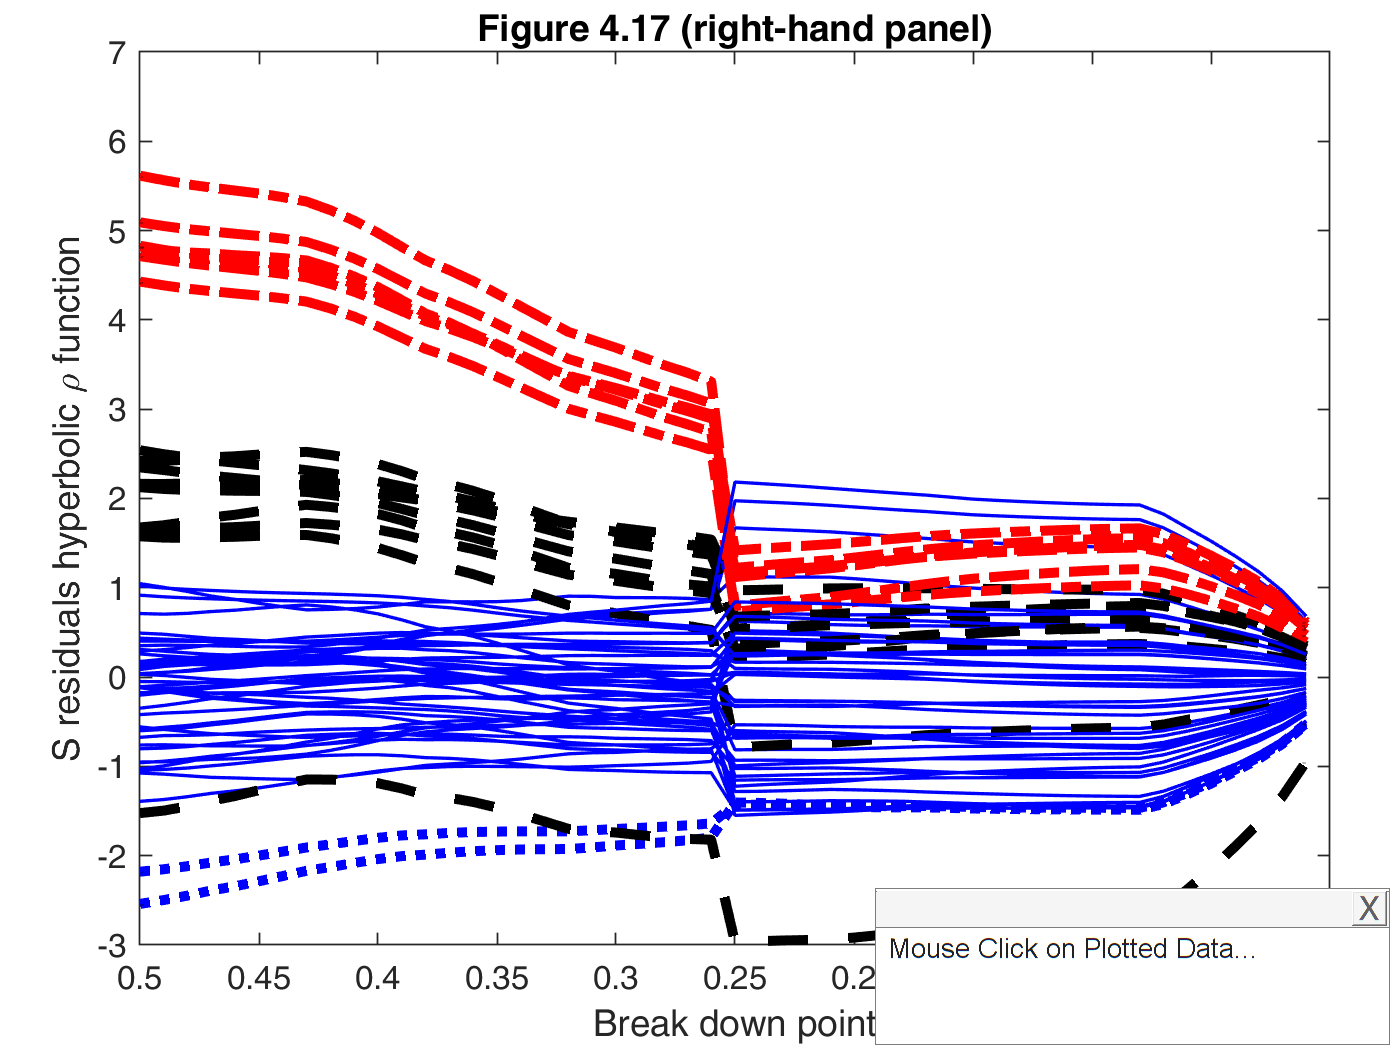

In [9]:
standard.laby='S residuals hyperbolic \rho function';
resfwdplot(outHYP,'fground',fground,'tag','pl_HYP', ...
    'corres',false,'standard',standard);
title('Figure 4.17 (right-hand panel)')
set(gcf,"Name",'Figure 4.17 (right-hand panel)')

## Create Figure 4.18


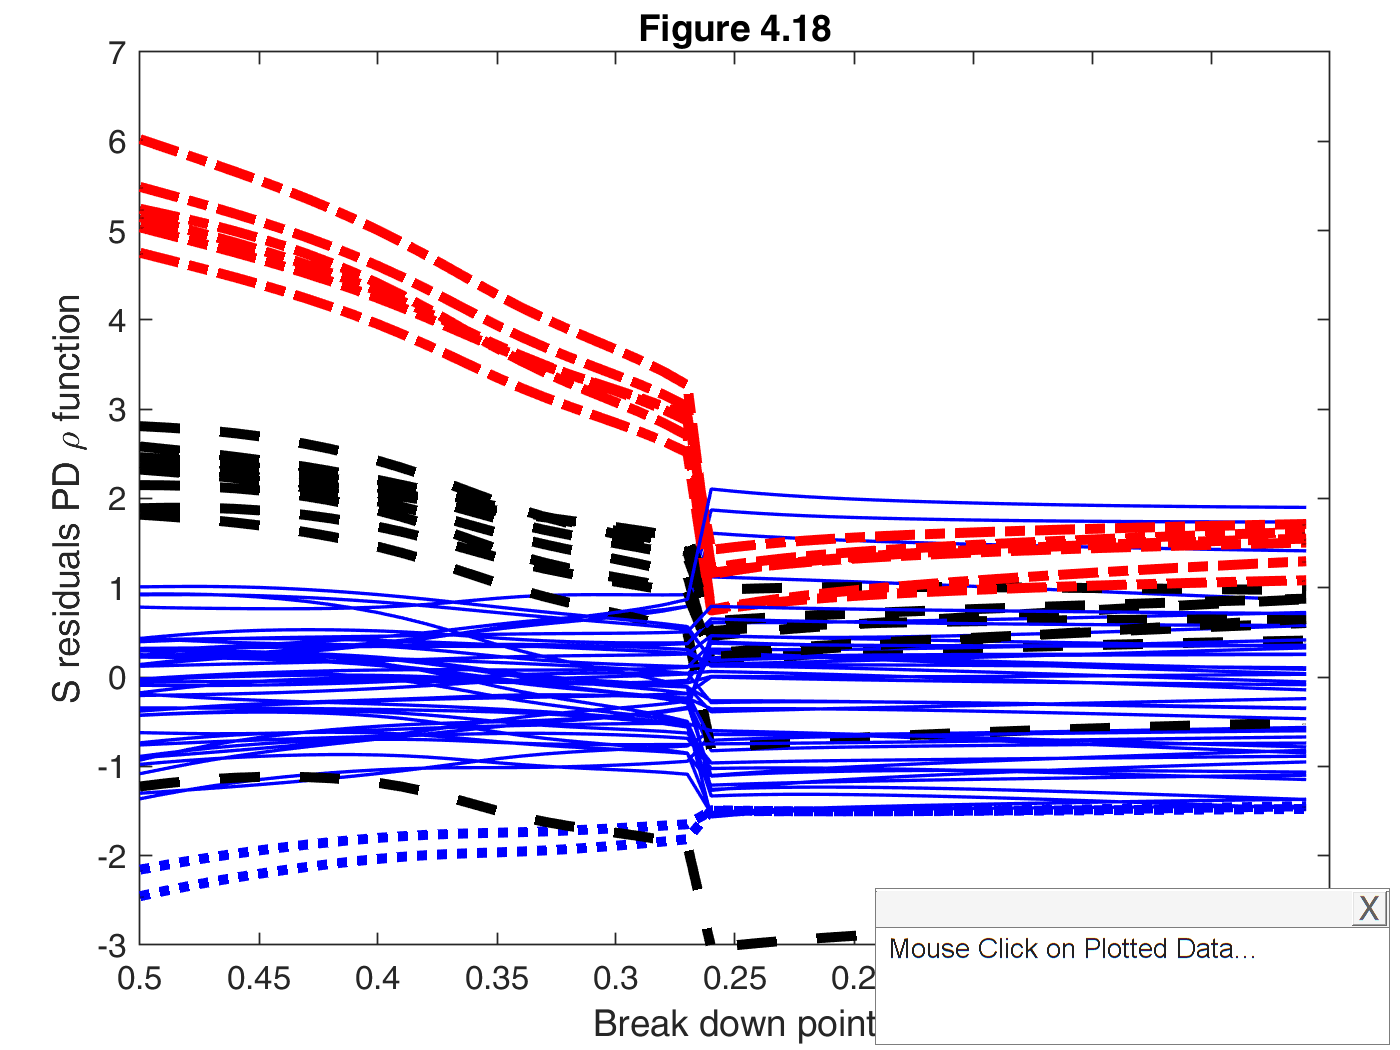

In [10]:
standard.laby='S residuals PD \rho function';
resfwdplot(outPD,'fground',fground,'tag','pl_PD', ...
    'corres',false,'standard',standard);
title('Figure 4.18')
set(gcf,"Name",'Figure 4.18')

In [11]:

if prin==1
    % print to postscript
    print -depsc ARmonPD.eps;
end

## Prepare input for Figures 4.19 and 4.20

In [12]:
bdp=0.5:-0.01:0.01;
RESLTS=zeros(n,length(bdp));
nsamp=20000;
RESLMS=zeros(n,length(bdp));

for j=1:length(bdp)
% Store LTS residuals
    [out]=LXS(y,X,'lms',2,'bdp',bdp(j),'nsamp',nsamp);
    RESLTS(:,j)=out.residuals;

    % Store LMS residuals
    [outLMS]=LXS(y,X,'bdp',bdp(j),'nsamp',nsamp);
    RESLMS(:,j)=outLMS.residuals;
end

Total estimated time to complete FASTLTS:  0.20 seconds 
Total estimated time to complete LMS:  0.07 seconds 
Total estimated time to complete FASTLTS:  0.07 seconds 
Total estimated time to complete LMS:  0.06 seconds 
Total estimated time to complete FASTLTS:  0.07 seconds 
Total estimated time to complete LMS:  0.06 seconds 
Total estimated time to complete FASTLTS:  0.06 seconds 
Total estimated time to complete LMS:  0.06 seconds 
Total estimated time to complete FASTLTS:  0.19 seconds 
Total estimated time to complete LMS:  0.06 seconds 
Total estimated time to complete FASTLTS:  0.06 seconds 
Total estimated time to complete LMS:  0.07 seconds 
Total estimated time to complete FASTLTS:  0.06 seconds 
Total estimated time to complete LMS:  0.07 seconds 
Total estimated time to complete FASTLTS:  0.18 seconds 
Total estimated time to complete LMS:  0.06 seconds 
Total estimated time to complete FASTLTS:  0.06 seconds 
Total estimated time to complete LMS:  0.06 seconds 
Total esti

In [13]:
outLTS=struct;
outLTS.RES=RESLTS;
outLTS.class='Sregeda';
outLTS.bdp=bdp;
outLTS.X=X;
outLTS.y=y;

outLMS=outLTS;
outLMS.RES=RESLMS;

## Create Figure 4.19


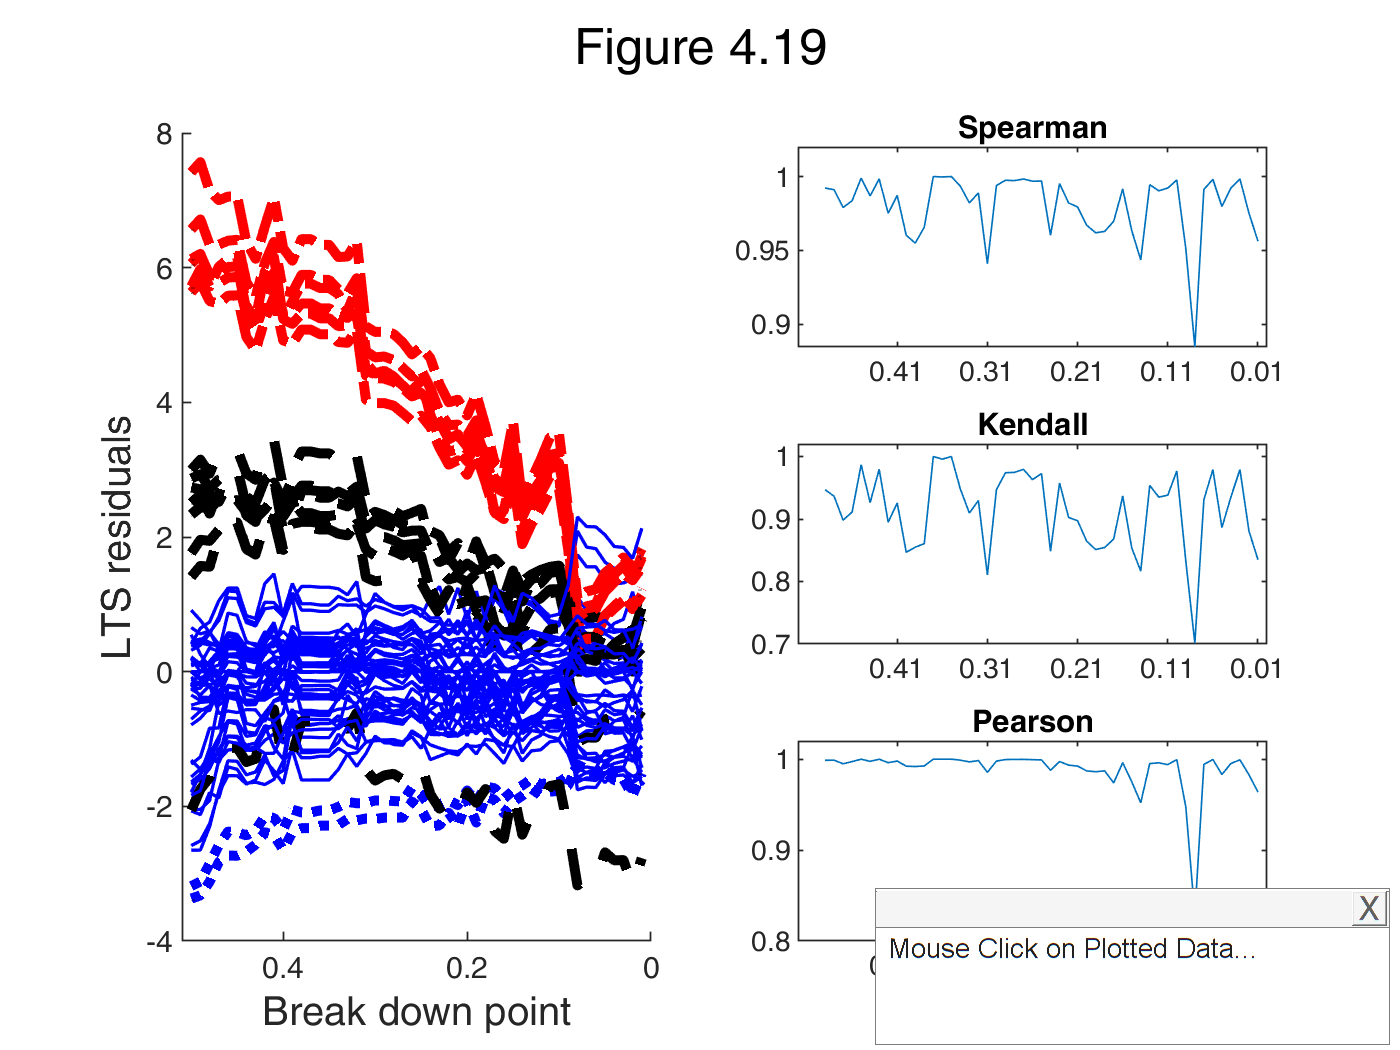

In [14]:
standard.laby='LTS residuals';
standard.ylim=[-4 8];
resfwdplot(outLTS,'fground',fground,'tag','pl_LTS', ...
    'corres',true,'standard',standard);
sgtitle('Figure 4.19')
set(gcf,"Name",'Figure 4.19')

## Create Figure 4.20


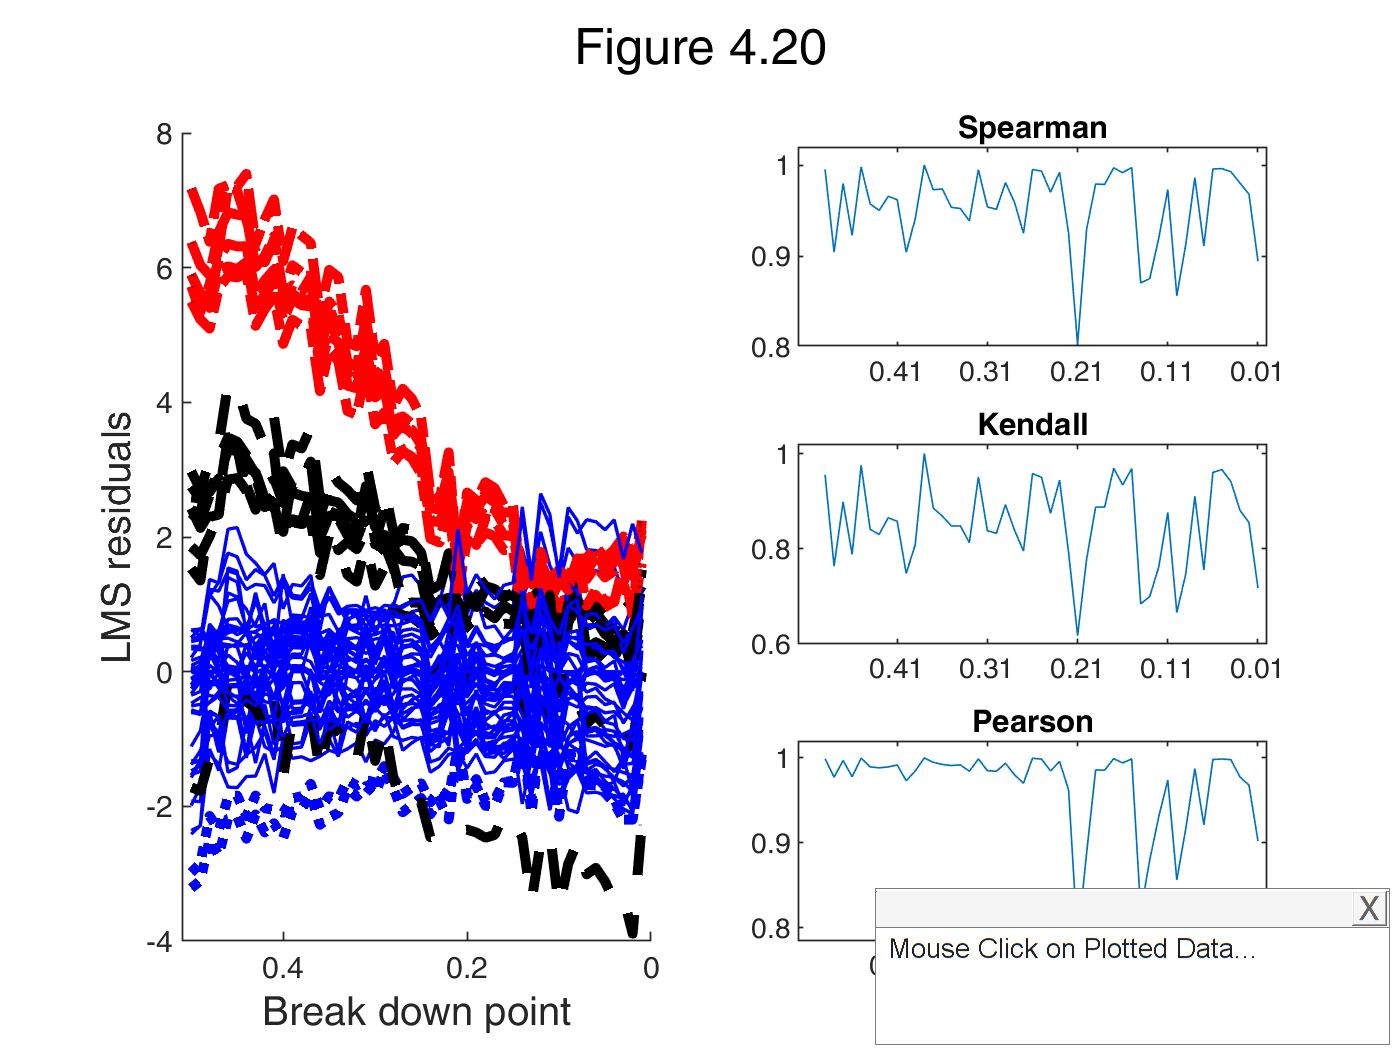

In [15]:
standard.laby='LMS residuals';
standard.ylim=[-4 8];
resfwdplot(outLMS,'fground',fground,'tag','pl_LMS', ...
    'corres',true,'standard',standard);
sgtitle('Figure 4.20')
set(gcf,"Name",'Figure 4.20')

## Create Figure 4.21

LMS using 10000 subsamples


In [16]:
[outLXS]=LXS(y,X,'nsamp',10000);

Total estimated time to complete LMS:  0.03 seconds


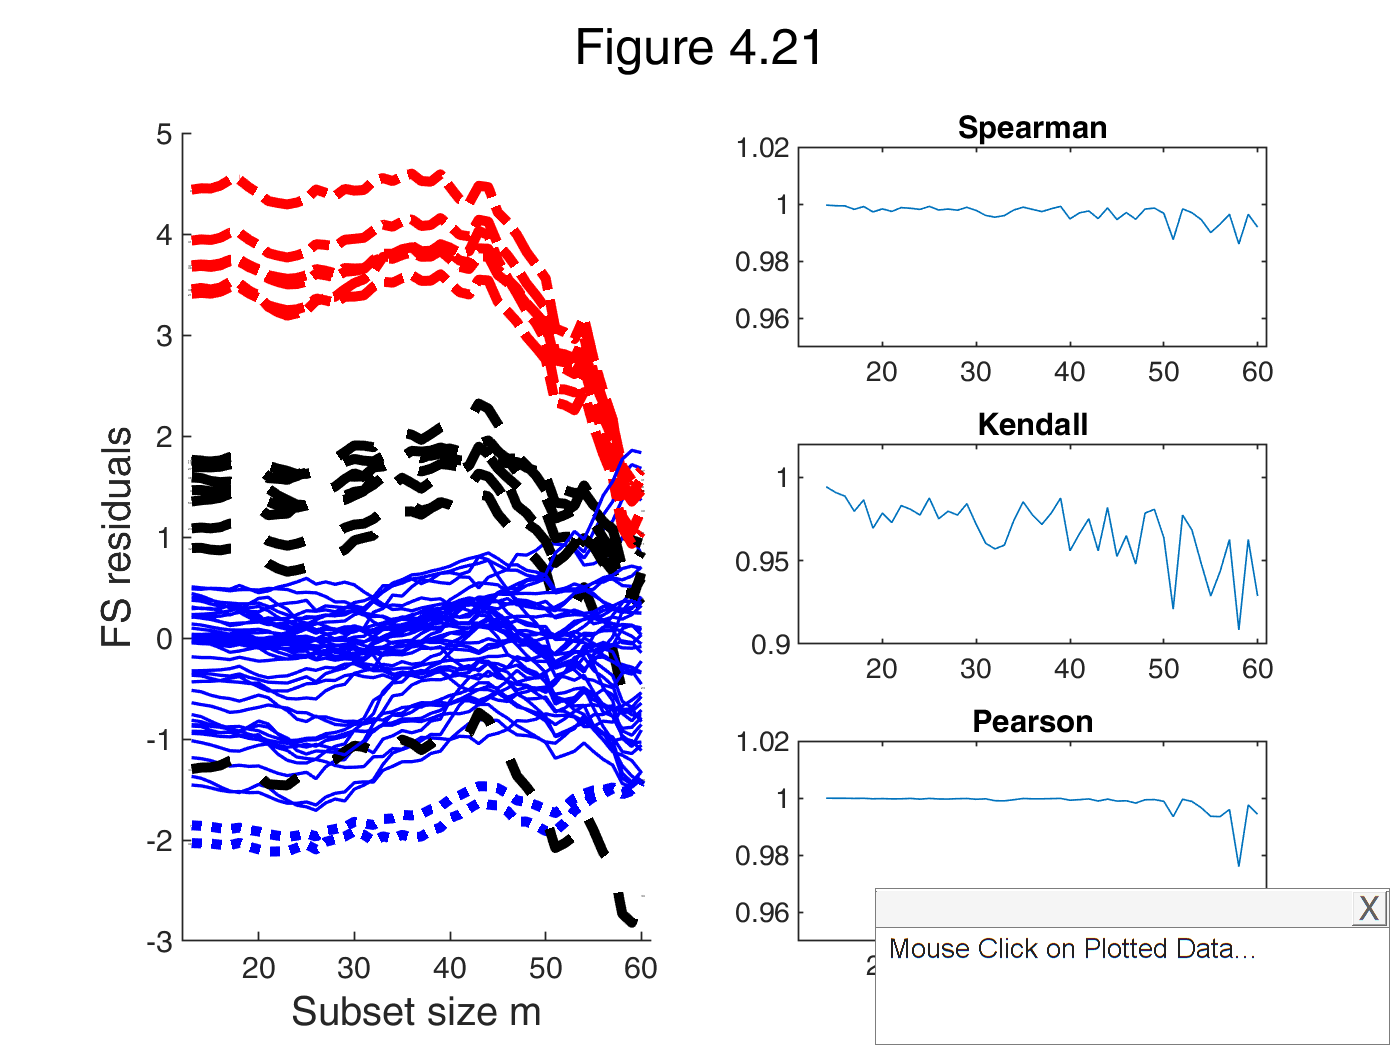

In [17]:
% Forward Search
[outFS]=FSReda(y,X,outLXS.bs);

standard.laby='FS residuals';
standard.ylim=[-3 5];
resfwdplot(outFS,'fground',fground,'tag','pl_FS', ...
    'corres',true,'standard',standard);
sgtitle('Figure 4.21')
set(gcf,"Name",'Figure 4.21')

## Create Figure 4.22

top panel



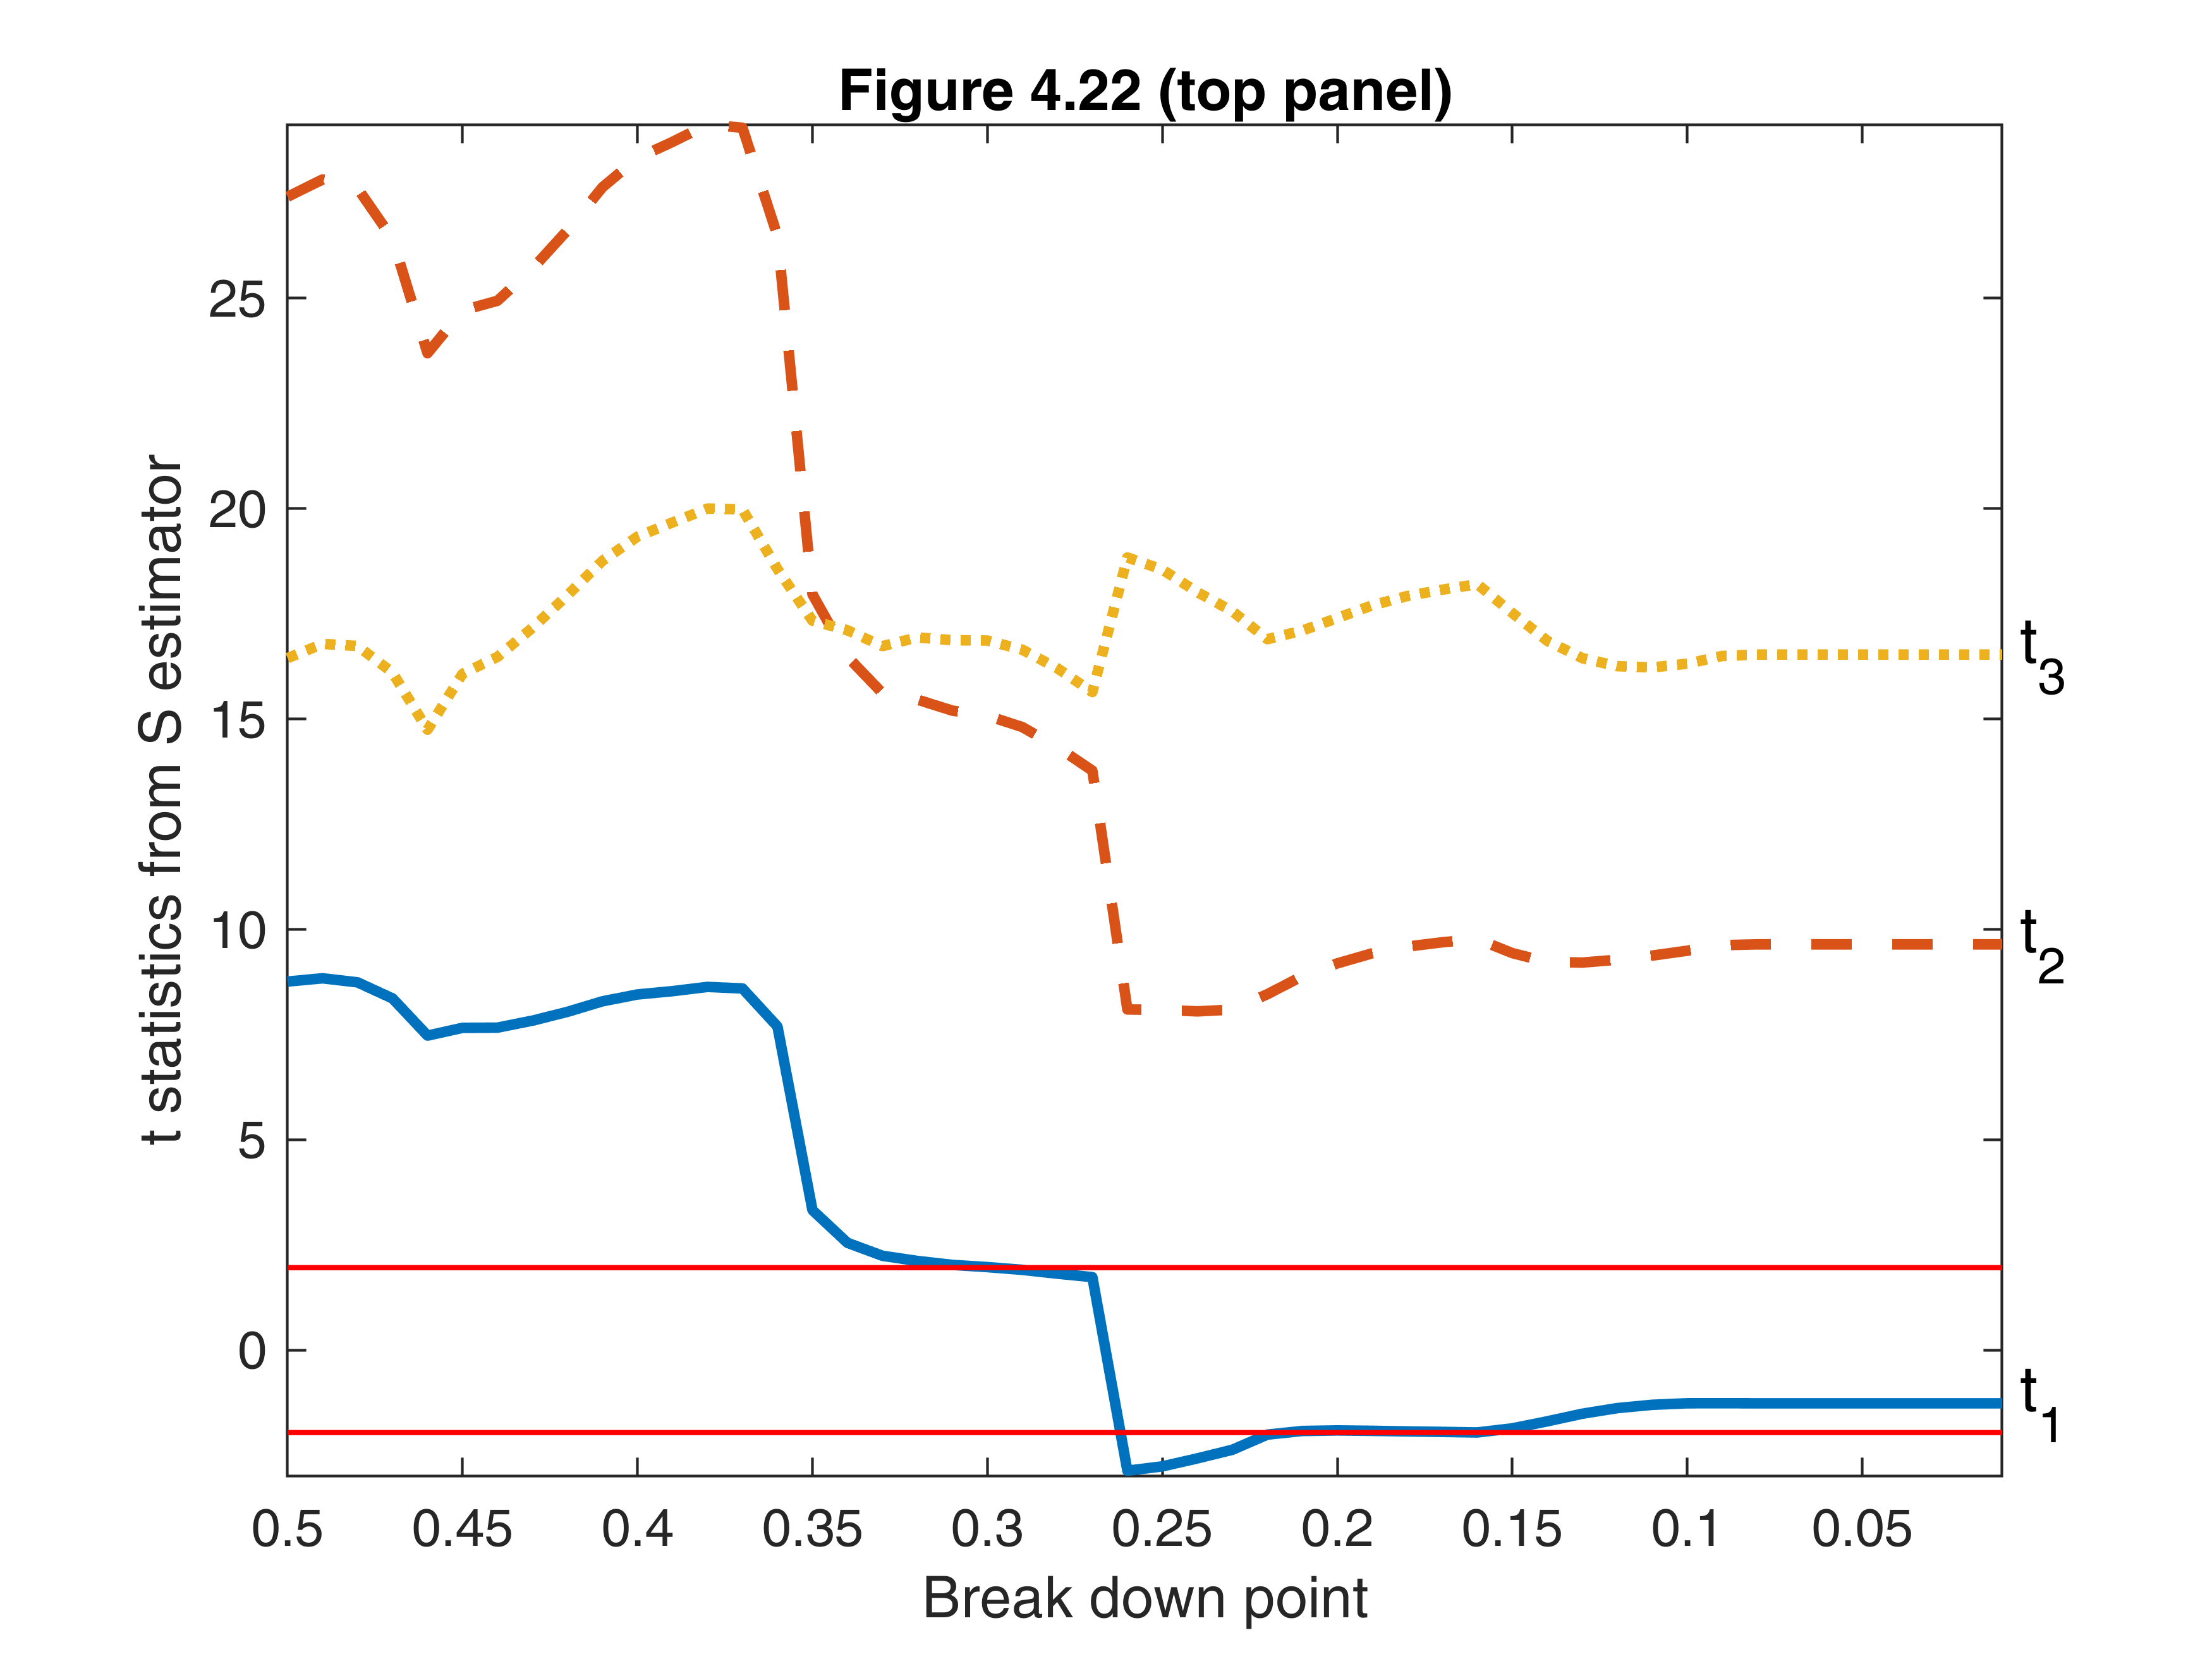

In [18]:
fanplotFS(outOPT,'conflev',0.95,'tag','plrobcopv0');
title('')
title('Figure 4.22 (top panel)')
set(gcf,"Name",'Figure 4.22 (top panel)')


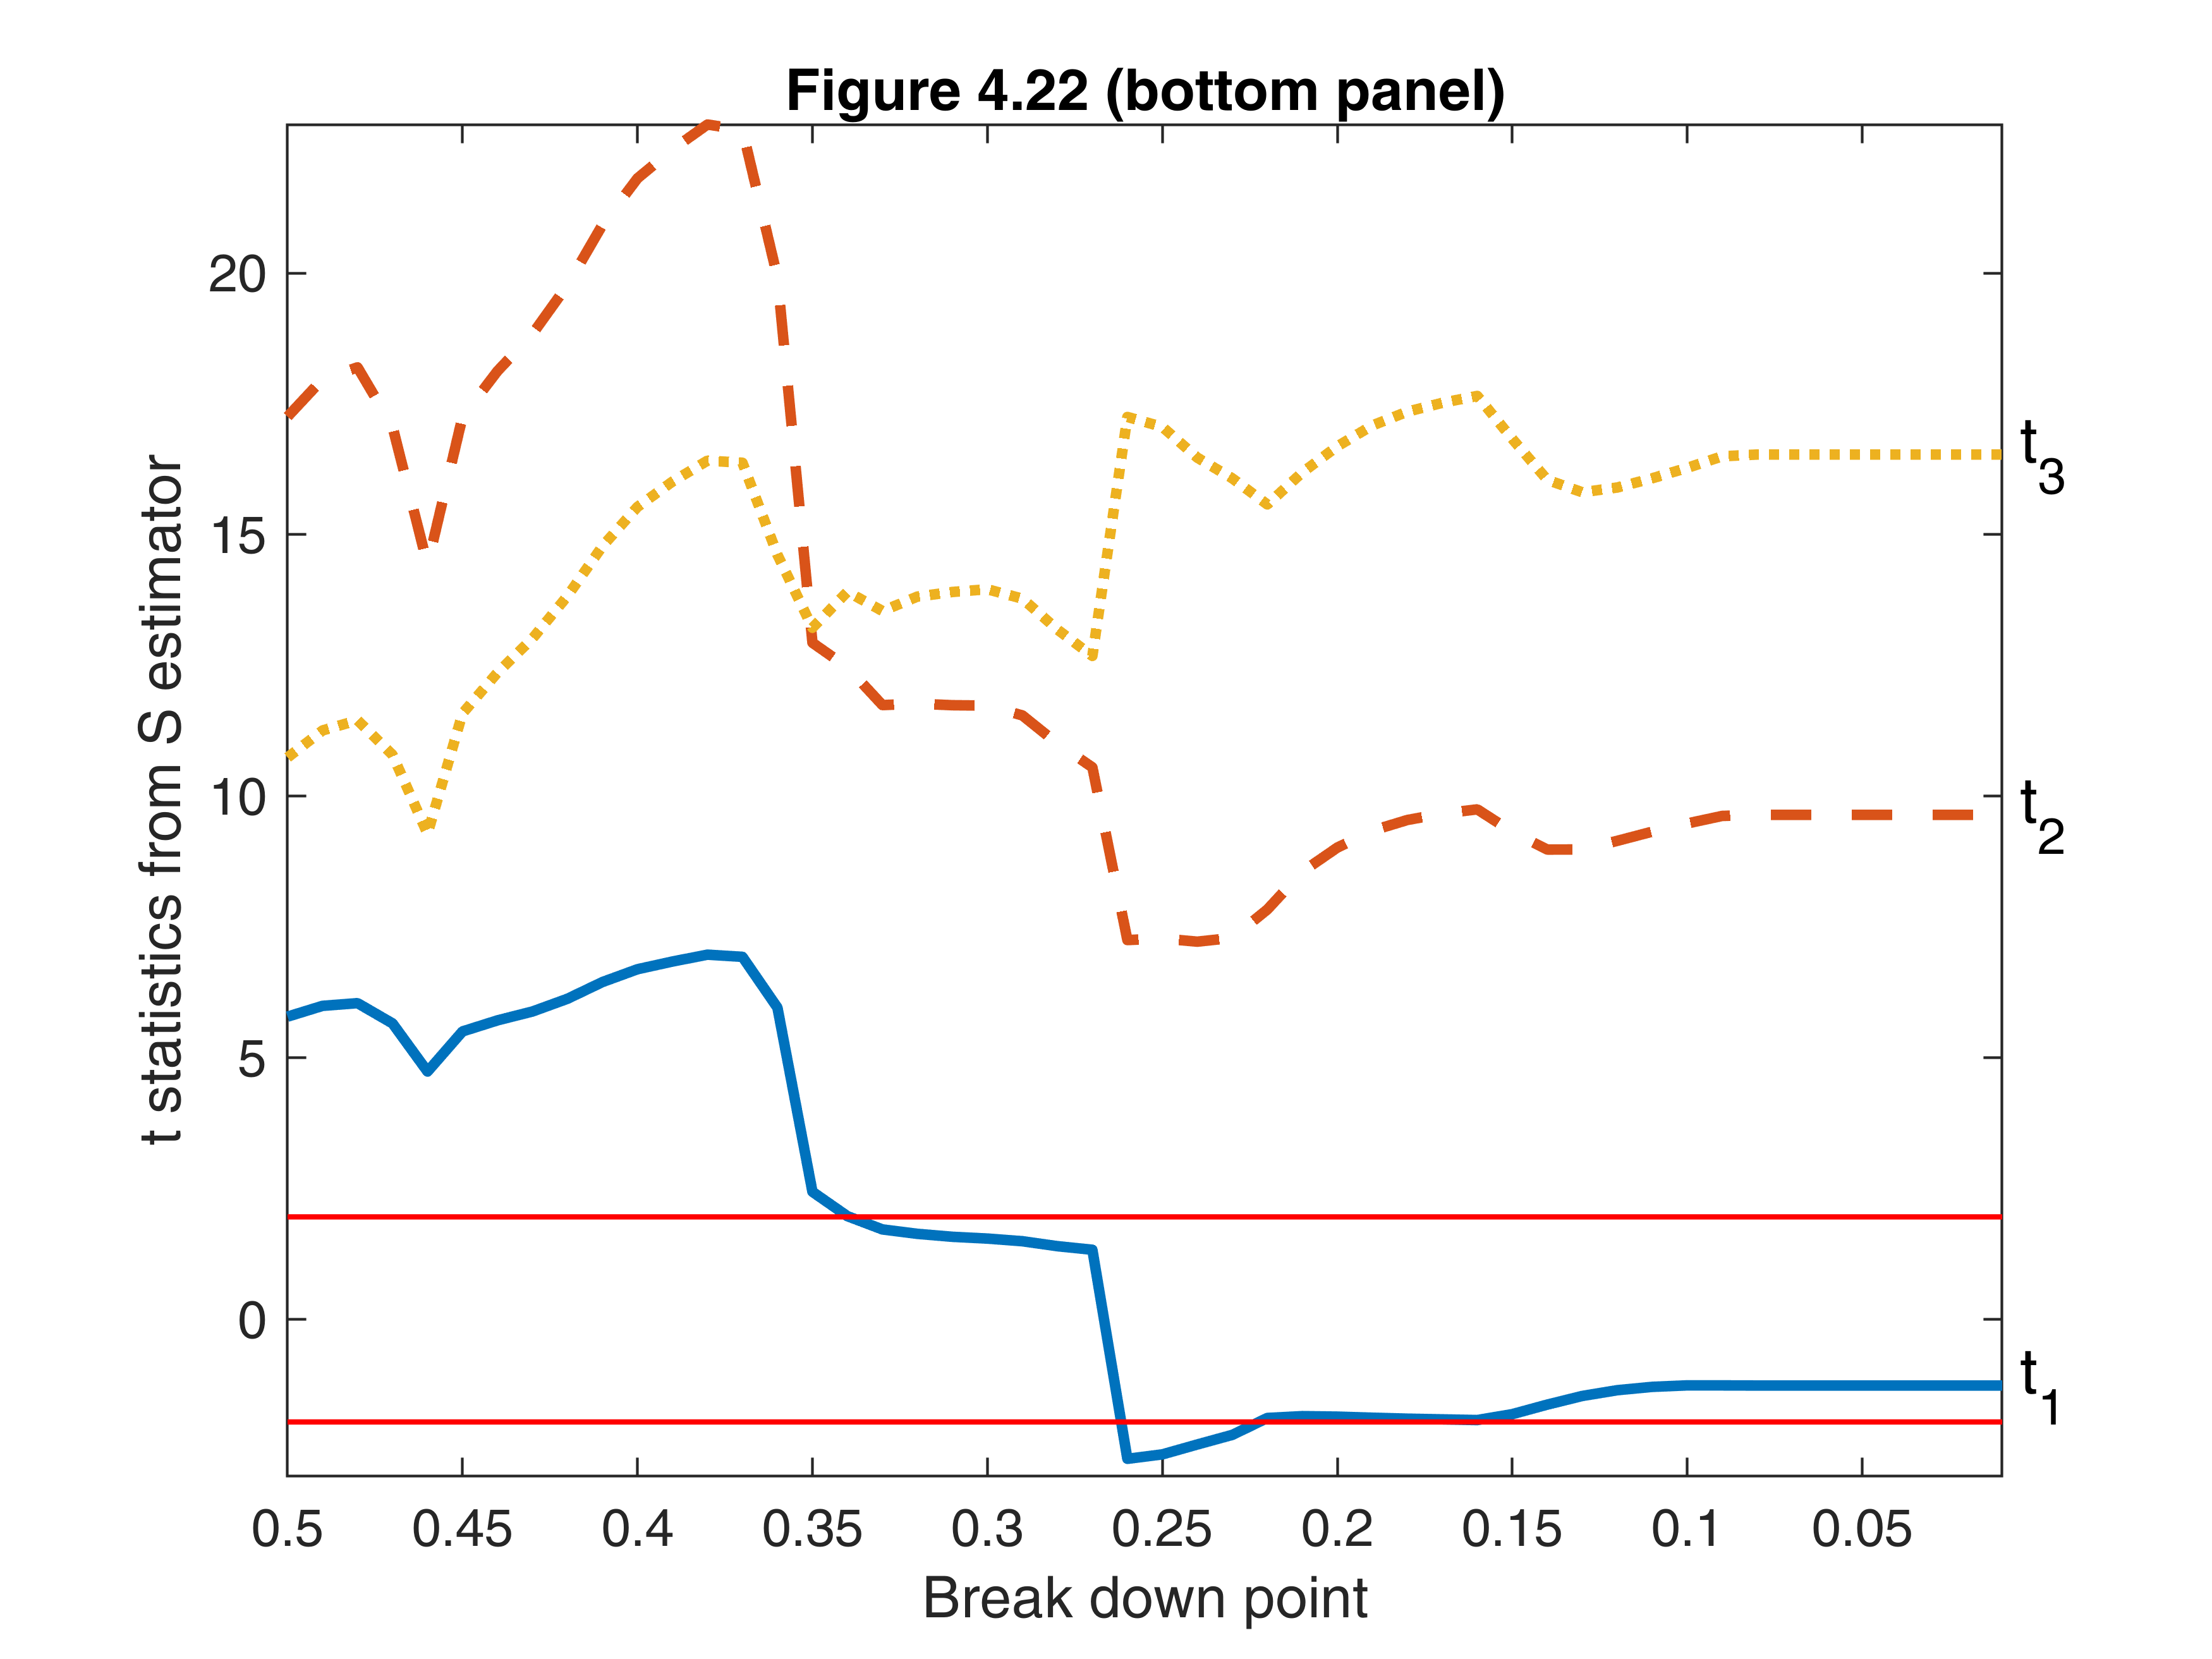

In [19]:

% bottom panel
fanplotFS(outOPT1,'conflev',0.95,'tag','plrobcopv1');
title('')
title('Figure 4.22 (bottom panel)')
set(gcf,"Name",'Figure 4.22 (bottom panel)')

In [20]:

if prin==1
    % print to postscript
    print -depsc StstatAR.eps;
end

%InsideREADME